# Data Deliquency Project

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file
df = pd.read_csv('train.csv',low_memory = False)
df = df.iloc[:,:37] #Extra columns are removed

In [3]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379849 entries, 0 to 379848
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            379849 non-null  object
 1   label                 379848 non-null  object
 2   msisdn                379848 non-null  object
 3   aon                   379846 non-null  object
 4   daily_decr30          379846 non-null  object
 5   daily_decr90          379844 non-null  object
 6   rental30              379843 non-null  object
 7   rental90              379843 non-null  object
 8   last_rech_date_ma     379841 non-null  object
 9   last_rech_date_da     379843 non-null  object
 10  last_rech_amt_ma      379843 non-null  object
 11  cnt_ma_rech30         379843 non-null  object
 12  fr_ma_rech30          379841 non-null  object
 13  sumamnt_ma_rech30     379840 non-null  object
 14  medianamnt_ma_rech30  379838 non-null  object
 15  medianmarechpreba

In [4]:
# Details of data
# Here every column we have is of numeric type(continuous) except 'maxamnt_loans90', which is categorical(6 & 12)
df.describe(include='all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,379849,379848,379848,379846,379846,379844,379843,379843,379841,379843,...,379809,379804,379802,379796,379794,379789,379787,379777,379770,379764
unique,190011,14,170642,4329,134608,142636,121385,128225,1130,1117,...,994,43,1033,104,48,42,1343,2319,36,127
top,38241,1,04581I85330,95,0,0,0,0,1,0,...,6,0,1,6,6,0,0,0,UPW,7/4/2016
freq,3,332378,14,713,7488,7345,13612,12467,85771,367503,...,324739,354034,133878,125312,327885,357552,193527,173552,379678,5710


In [5]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272,3055.05,3065.15,220.13,260.13,2,0,...,6,0,2,12,6,0,29,29,UPW,7/20/2016
1,2,1,76462I70374,712,12122,12124.75,3691.26,3691.26,20,0,...,12,0,1,12,12,0,0,0,UPW,8/10/2016
2,3,1,17943I70372,535,1398,1398,900.13,900.13,3,0,...,6,0,1,6,6,0,0,0,UPW,8/19/2016
3,4,1,55773I70781,241,21.228,21.228,159.42,159.42,41,0,...,6,0,2,12,6,0,0,0,UPW,6/6/2016
4,5,1,03813I82730,947,150.6193333,150.6193333,1098.9,1098.9,4,0,...,6,0,7,42,6,0,2.333333333,2.333333333,UPW,6/22/2016


In [6]:
# Drop useless columns which donot effect your result

df.drop(columns = ['pcircle','msisdn','medianmarechprebal30','pdate'],axis = 1,inplace=True)

In [7]:
df.rename(columns={'Unnamed: 0':'Index'},inplace = True)
df.set_index('Index',inplace = True)

In [8]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Index,,,,,,,,,,,,,,,,,,,,,
1,0,272,3055.05,3065.15,220.13,260.13,2,0,1539,2,...,2,12,6,0,2,12,6,0,29,29
2,1,712,12122,12124.75,3691.26,3691.26,20,0,5787,1,...,1,12,12,0,1,12,12,0,0,0
3,1,535,1398,1398,900.13,900.13,3,0,1539,1,...,1,6,6,0,1,6,6,0,0,0
4,1,241,21.228,21.228,159.42,159.42,41,0,947,0,...,2,12,6,0,2,12,6,0,0,0
5,1,947,150.6193333,150.6193333,1098.9,1098.9,4,0,2309,7,...,7,42,6,0,7,42,6,0,2.333333333,2.333333333


In [9]:
# convert all str data to float for prediction

def string_to_integer(value):
    try:
        return float(value)
    except:
        return np.nan
    
for i in df:
    df[i] = df[i].apply(lambda x: string_to_integer(x))

In [10]:
# drop NaN values and their corresponding rows
df.dropna(axis = 0,how = 'any',inplace = True)
np.sum(df.isnull().sum())

0

In [11]:
# The very large value in the dataset is nothing but trash. We need to remove all these values either by replacing
# it with some other value or by just dropping those rows
for i in df:
    print(i,':', max(df[i]))

label : 1.0
aon : 999520.6094
daily_decr30 : 265926.0
daily_decr90 : 269333333.0
rental30 : 71900844.0
rental90 : 669399.5
last_rech_date_ma : 997717.8096
last_rech_date_da : 999171.8094
last_rech_amt_ma : 55000.0
cnt_ma_rech30 : 7109.57
fr_ma_rech30 : 999606.3681
sumamnt_ma_rech30 : 810096.0
medianamnt_ma_rech30 : 55000.0
cnt_ma_rech90 : 11929.0
fr_ma_rech90 : 9239.0
sumamnt_ma_rech90 : 953036.0
medianamnt_ma_rech90 : 791423.3321
medianmarechprebal90 : 833251.4139
cnt_da_rech30 : 99842.33633
fr_da_rech30 : 999809.2401
cnt_da_rech90 : 24000.0
fr_da_rech90 : 72579.0
cnt_loans30 : 47023.0
amnt_loans30 : 5787.0
maxamnt_loans30 : 784312.497
medianamnt_loans30 : 102588.0
cnt_loans90 : 11079.0
amnt_loans90 : 11547.0
maxamnt_loans90 : 6933.0
medianamnt_loans90 : 61909.0
payback30 : 54960.0
payback90 : 16893.0


In [12]:
# Removing trash by dropping rows in dataset.
''' Considering any threshold value and comparing with each data. The data larger than the threshold value will be
considered as trash.'''

def remove_trash(value, threshold):
    if value > threshold:
        return np.nan
    else:
        return value

In [13]:
for i in df:
    threshold = 8*np.mean(df[i])
    df[i] = df[i].apply(lambda x:remove_trash(x, threshold))

In [14]:
# Dropping all NaN value rows
df.dropna(axis = 0,how = 'any',inplace = True)
np.sum(df.isnull().sum())

0

> **Let us now check how result is affected by every columns and we will remove every unnecessary column from our dataset**

*We will check this using histogram plot by seaborn library*

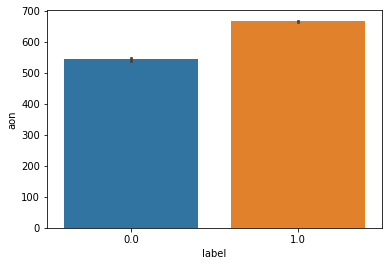

In [15]:
sns.barplot(x = df['label'],y = df['aon'])

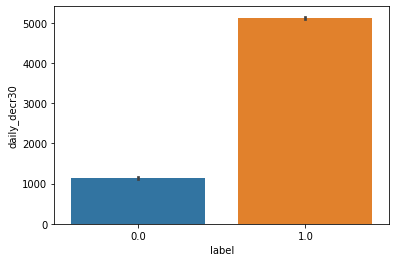

In [16]:
sns.barplot(y = 'daily_decr30',x = 'label', data = df)

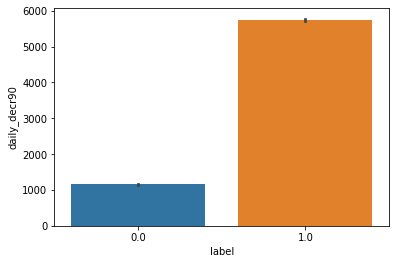

In [17]:
sns.barplot(x = df['label'],y = df['daily_decr90']) # Similar to daily_decr30

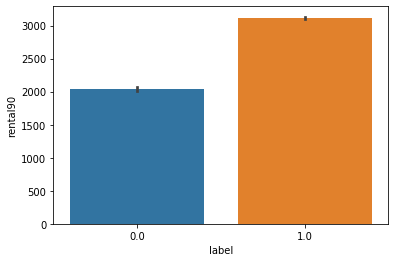

In [18]:
sns.barplot(x=df['label'],y = df['rental90']) 

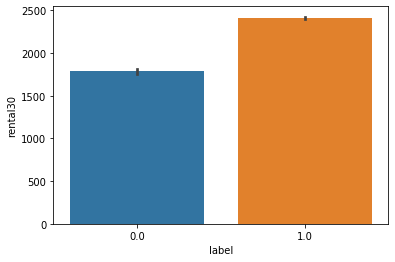

In [19]:
sns.barplot(x = df['label'],y = df['rental30']) # similar to rental90

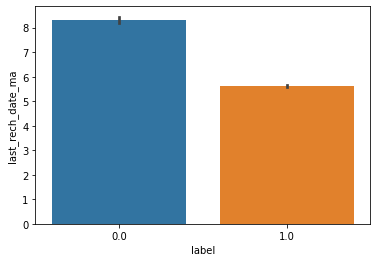

In [20]:
sns.barplot(x = df['label'],y = df['last_rech_date_ma'])

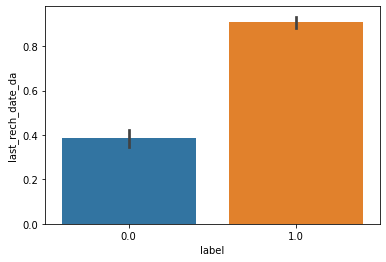

In [21]:
sns.barplot(x = 'label',y = 'last_rech_date_da', data = df)

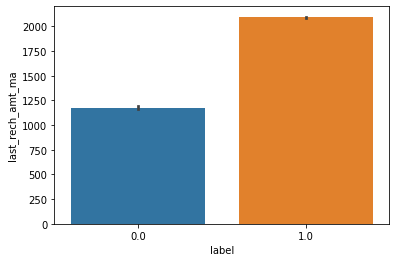

In [22]:
sns.barplot(x = 'label', y = 'last_rech_amt_ma', data = df)

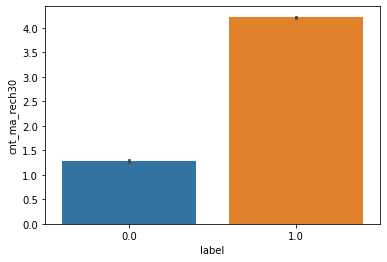

In [23]:
sns.barplot(x = 'label',y = 'cnt_ma_rech30', data = df) # Useless

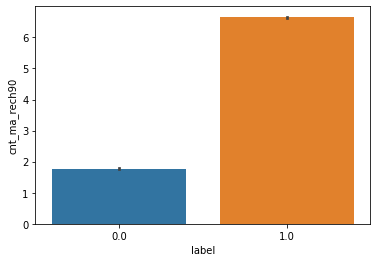

In [24]:
sns.barplot(x = 'label',y = 'cnt_ma_rech90', data = df) # similar to cnt_ma_rech30

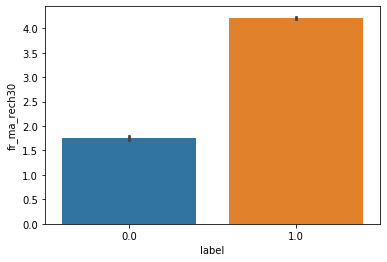

In [25]:
sns.barplot(x = 'label', y = 'fr_ma_rech30', data = df) 

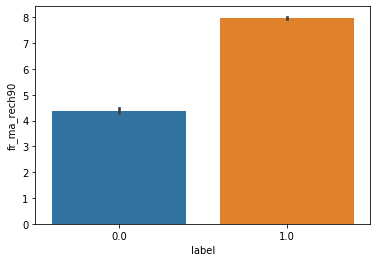

In [26]:
sns.barplot(x = 'label', y = 'fr_ma_rech90', data = df) # similar to fr_ma_rech30

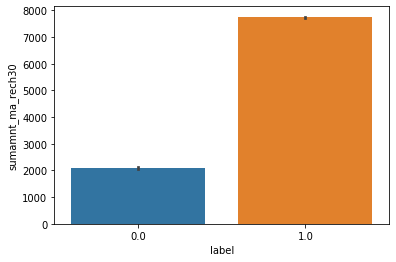

In [27]:
sns.barplot(x = 'label',y = 'sumamnt_ma_rech30', data = df) 

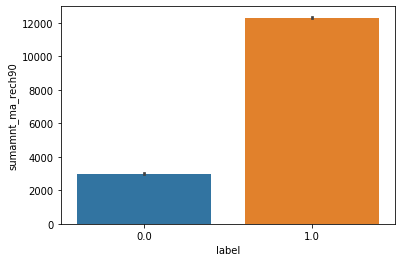

In [28]:
sns.barplot(x = 'label',y = 'sumamnt_ma_rech90', data = df) # similar to sumamnt_ma_rech30

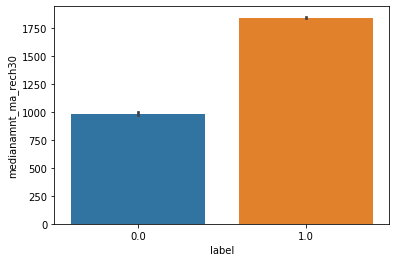

In [29]:
sns.barplot(x = 'label',y = 'medianamnt_ma_rech30', data = df) 

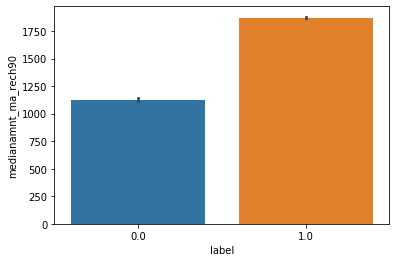

In [30]:
sns.barplot(x = 'label',y = 'medianamnt_ma_rech90', data = df) # similar to medianamnt_ma_rech30

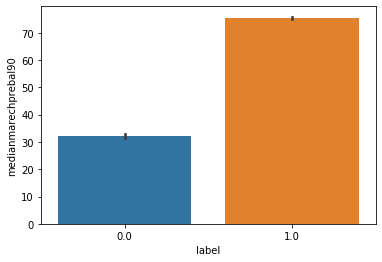

In [31]:
sns.barplot(x = 'label',y = 'medianmarechprebal90', data = df)

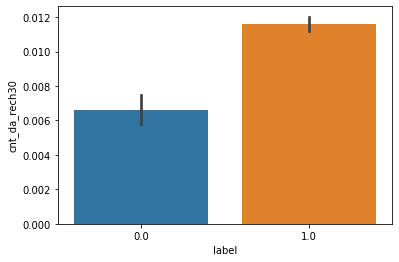

In [32]:
sns.barplot(x = 'label', y = 'cnt_da_rech30', data = df) #Useless

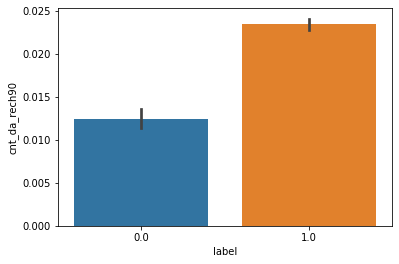

In [33]:
sns.barplot(x = 'label', y = 'cnt_da_rech90', data = df) # similar to cnt_da_rech30

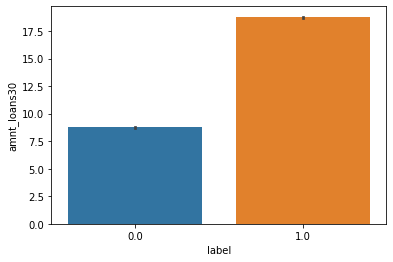

In [34]:
sns.barplot(x = 'label', y = 'amnt_loans30', data = df) 

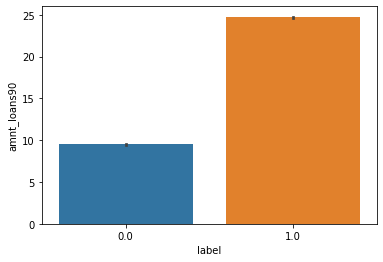

In [35]:
sns.barplot(x = 'label', y = 'amnt_loans90', data = df) #similar to amnt_loans30

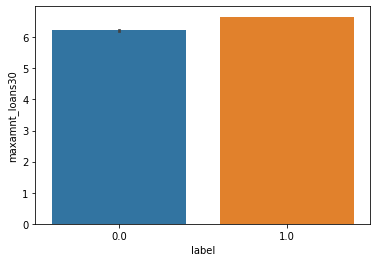

In [36]:
sns.barplot(x = 'label', y = 'maxamnt_loans30', data = df)

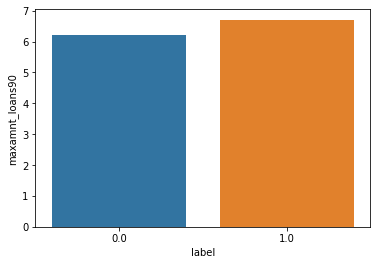

In [37]:
sns.barplot(x = 'label', y = 'maxamnt_loans90', data = df) # similar to maxamnt_loans30

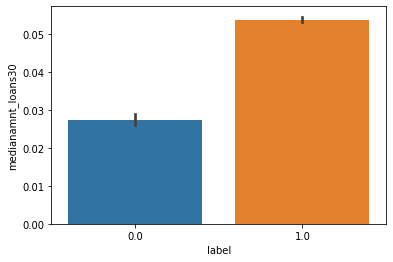

In [38]:
sns.barplot(x = 'label', y = 'medianamnt_loans30', data = df) 

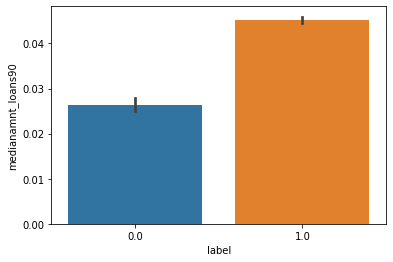

In [39]:
sns.barplot(x = 'label', y = 'medianamnt_loans90', data = df) # similar to medianamnt_loans30

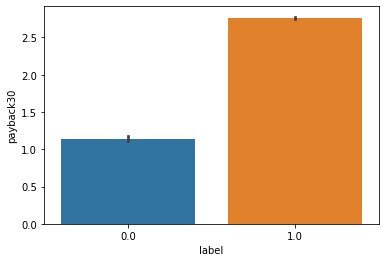

In [40]:
sns.barplot(x = 'label', y = 'payback30', data = df) 

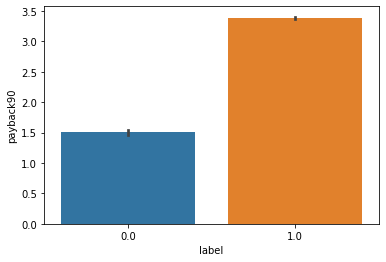

In [41]:
sns.barplot(x = 'label', y = 'payback90', data = df) # similar to payback30

**Conclusion:** By looking at the plots we can conclude that the data distribution for 30 days and 90 days are almost similar. So, we can either drop 30 days data or 90 days data and proceed.

In [42]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90'],
      dtype='object')

In [43]:
# Dropping Columns
df.drop(['daily_decr90','rental30', 'cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','cnt_da_rech30',
         'fr_da_rech30','cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30','payback30'],
       axis = 1, inplace = True)

In [44]:
df.head()

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
Index,,,,,,,,,,,,,,,,,,,
2,1.0,712.0,12122.000000,3691.26,20.0,0.0,5787.0,1.0,0.0,5787.0,5787.0,61.04,0.0,0.0,1.0,12.0,12.0,0.0,0.000000
3,1.0,535.0,1398.000000,900.13,3.0,0.0,1539.0,1.0,0.0,1539.0,1539.0,66.32,0.0,0.0,1.0,6.0,6.0,0.0,0.000000
4,1.0,241.0,21.228000,159.42,41.0,0.0,947.0,1.0,0.0,947.0,947.0,2.50,0.0,0.0,2.0,12.0,6.0,0.0,0.000000
5,1.0,947.0,150.619333,1098.90,4.0,0.0,2309.0,8.0,2.0,23496.0,2888.0,35.00,0.0,0.0,7.0,42.0,6.0,0.0,2.333333
6,1.0,568.0,2257.362667,380.13,2.0,0.0,1539.0,8.0,0.0,11744.0,1539.0,55.90,0.0,0.0,3.0,18.0,6.0,0.0,8.333333


In [45]:
df.shape

(329451, 19)

In [46]:
# For categorical data
print(df['maxamnt_loans90'] == 6)

Index
2         False
3          True
4          True
5          True
6          True
          ...  
189995    False
189996     True
189997     True
190000     True
190001    False
Name: maxamnt_loans90, Length: 329451, dtype: bool


In [47]:
print(df['label'][df['maxamnt_loans90']==6])
print(df['label'][df['maxamnt_loans90']==6].value_counts())

Index
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
         ... 
189992    1.0
189994    1.0
189996    0.0
189997    0.0
190000    0.0
Name: label, Length: 288360, dtype: float64
1.0    248266
0.0     40094
Name: label, dtype: int64


In [48]:
print(df['label'][df['maxamnt_loans90']==6].value_counts())
print(df['label'][df['maxamnt_loans90']==6].value_counts(normalize = True))

1.0    248266
0.0     40094
Name: label, dtype: int64
1.0    0.860959
0.0    0.139041
Name: label, dtype: float64


In [49]:
print('Percentage of users(took loan of Rs.6), paid their loan: ',df['label'][df['maxamnt_loans90']==6].value_counts(normalize = True)[1]*100,'%')
print('Percentage of users(took loan of Rs.12) paid their loan: ',df['label'][df['maxamnt_loans90']==12].value_counts(normalize = True)[1]*100,'%')

Percentage of users(took loan of Rs.6), paid their loan:  86.09585240671383 %
Percentage of users(took loan of Rs.12) paid their loan:  96.0007347731388 %


In [50]:
df.describe(include = 'all')

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000,329451.000000
mean,0.873675,651.000835,4618.771961,2980.312087,5.955617,0.841212,1975.261584,6.024765,7.526348,11133.950988,1778.721819,70.026801,0.022028,0.000358,3.588807,22.766345,6.639664,0.042900,3.150558
std,0.332216,499.756713,7060.672251,4398.136627,9.491131,6.812485,2152.203146,6.319953,12.038613,12669.753693,1892.465961,107.621555,0.154589,0.029047,3.675946,23.653125,2.020140,0.185741,4.872537
min,0.000000,-48.000000,-46.215000,-7786.750000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,240.000000,37.436833,283.730000,1.000000,0.000000,770.000000,2.000000,0.000000,2312.000000,773.000000,14.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,515.000000,1200.000000,1225.920000,3.000000,0.000000,1539.000000,4.000000,2.000000,7029.000000,1539.000000,34.900000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.500000
75%,1.000000,953.000000,6613.762000,3791.560000,7.000000,0.000000,2309.000000,8.000000,8.000000,15414.000000,1731.500000,76.800000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.333333
max,1.000000,2883.000000,42763.317000,27679.870000,113.000000,115.000000,16000.000000,51.000000,63.000000,98644.000000,14250.000000,778.210000,2.000000,3.000000,31.000000,186.000000,12.000000,1.500000,35.000000


- From above description: We have negative values in our dataset? but how is it possible, because according to our dataset nothing can be negative. Therefore, all those values are also trash which we will clean now.

In [51]:
# Replacing negative values with NaN
for i in df:
    df[i] = df[i].apply(lambda x: np.nan if x<0 else x)

In [52]:
# Removing NaN values
df.dropna(axis = 0,how = 'any',inplace = True)

In [53]:
df.describe(include='all')

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.00000,310017.000000
mean,0.880994,652.821087,4832.962227,3133.023055,6.099066,0.875571,1931.107162,6.222491,7.499656,11301.425222,1733.592205,71.930203,0.022583,0.000381,3.690807,23.439377,6.667841,0.04237,3.244834
std,0.323797,496.041319,7177.147046,4453.899243,9.110418,6.957336,2064.736320,6.404492,11.934443,12711.228177,1798.602418,105.321513,0.156478,0.029943,3.735020,24.039823,2.059271,0.18434,4.913048
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,244.000000,41.310000,349.230000,1.000000,0.000000,770.000000,2.000000,0.000000,2319.000000,773.000000,15.500000,0.000000,0.000000,1.000000,6.000000,6.000000,0.00000,0.000000
50%,1.000000,516.000000,1480.254000,1349.100000,3.000000,0.000000,1539.000000,4.000000,2.000000,7134.000000,1539.000000,36.250000,0.000000,0.000000,2.000000,12.000000,6.000000,0.00000,1.750000
75%,1.000000,951.000000,7002.780000,3999.100000,7.000000,0.000000,2309.000000,9.000000,8.000000,15577.000000,1633.500000,77.450000,0.000000,0.000000,5.000000,30.000000,6.000000,0.00000,4.428571
max,1.000000,2883.000000,42763.317000,27679.870000,113.000000,115.000000,16000.000000,51.000000,63.000000,98644.000000,14250.000000,778.210000,2.000000,3.000000,31.000000,186.000000,12.000000,1.50000,35.000000


> Cleaning of data is done. Now, we will start convert these Continuous values to categorical values. So that we can use it in our Machine Learning models

In [54]:
# Let us start working

bins = [-1,50,250,400,650,700,850,np.inf]
labels = [1, 2, 3, 4, 5, 6, 7]
df['AgeOnNetwork'] = pd.cut(df['aon'],bins, labels = labels)

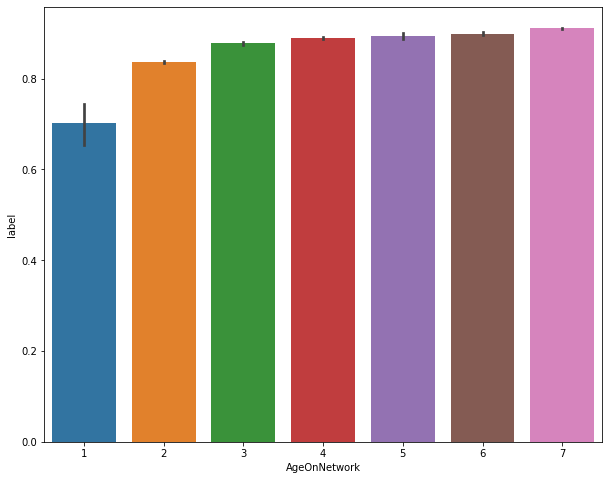

In [55]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'AgeOnNetwork', y = 'label',data = df, ax = ax)

In [56]:
bins_2 = [-1,500,1000,2000,3500,5000,np.inf]
labels_2 = [1, 2,3,4,5,6]
df['DailyAmountSpent'] = pd.cut(df['daily_decr30'], bins = bins_2, labels = labels_2)

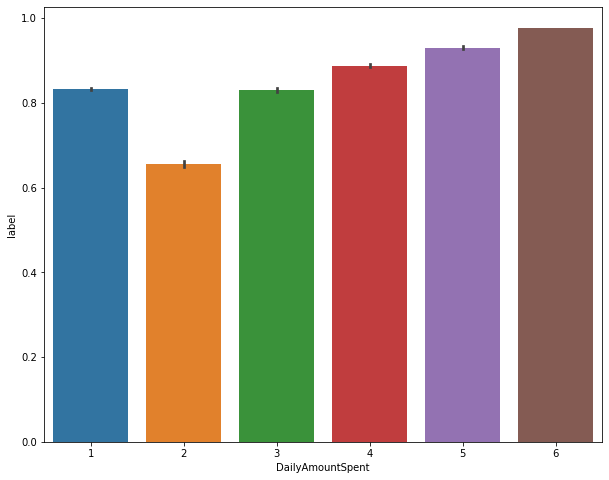

In [57]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'DailyAmountSpent', y = 'label',data = df, ax = ax)

In [58]:
bins_3 = [-1,200,400,650,900,1500,np.inf]
labels_3 = [1,2,3,4,5,6]
df['AverageMainBalance'] = pd.cut(df['rental90'],bins = bins_3,labels = labels_3)

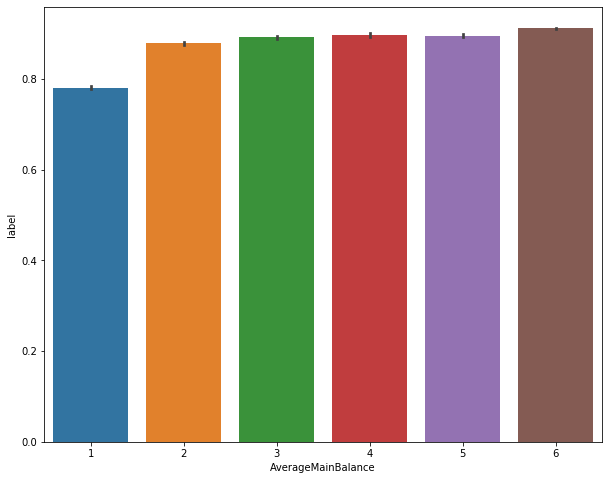

In [59]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'AverageMainBalance', y = 'label',data = df, ax = ax)

In [60]:
bins_4 = [-1,2,4,10,np.inf]
labels_4 = [1,2,3,4]
df['DaysTillLastRecharge'] = pd.cut(df['last_rech_date_ma'],bins = bins_4,labels = labels_4)

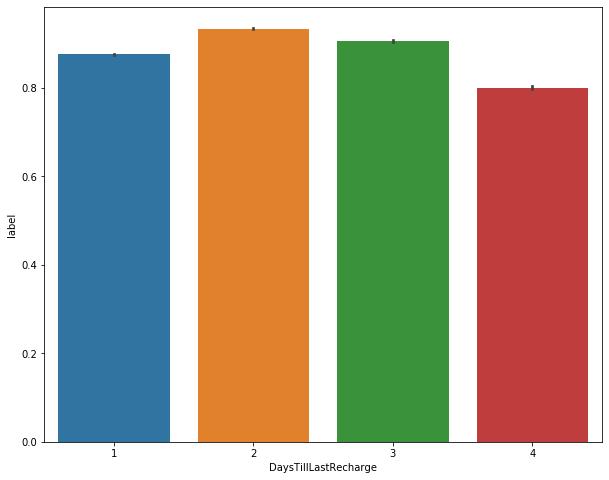

In [61]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'DaysTillLastRecharge', y = 'label',data = df, ax = ax)

In [62]:
df.drop(['last_rech_date_da','cnt_da_rech90','fr_da_rech90'],axis = 1,inplace = True) # dropping these because they
# donot effect our result.

In [63]:
df.describe()

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.000000,310017.00000,310017.000000
mean,0.880994,652.821087,4832.962227,3133.023055,6.099066,1931.107162,6.222491,7.499656,11301.425222,1733.592205,71.930203,3.690807,23.439377,6.667841,0.04237,3.244834
std,0.323797,496.041319,7177.147046,4453.899243,9.110418,2064.736320,6.404492,11.934443,12711.228177,1798.602418,105.321513,3.735020,24.039823,2.059271,0.18434,4.913048
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,244.000000,41.310000,349.230000,1.000000,770.000000,2.000000,0.000000,2319.000000,773.000000,15.500000,1.000000,6.000000,6.000000,0.00000,0.000000
50%,1.000000,516.000000,1480.254000,1349.100000,3.000000,1539.000000,4.000000,2.000000,7134.000000,1539.000000,36.250000,2.000000,12.000000,6.000000,0.00000,1.750000
75%,1.000000,951.000000,7002.780000,3999.100000,7.000000,2309.000000,9.000000,8.000000,15577.000000,1633.500000,77.450000,5.000000,30.000000,6.000000,0.00000,4.428571
max,1.000000,2883.000000,42763.317000,27679.870000,113.000000,16000.000000,51.000000,63.000000,98644.000000,14250.000000,778.210000,31.000000,186.000000,12.000000,1.50000,35.000000


In [64]:
bins_5 = [-1,200,800,1500,2000,np.inf]
labels_5 = [1,2,3,4,5]
df['AmountLastRecharge'] = pd.cut(df['last_rech_amt_ma'],bins = bins_5,labels = labels_5)

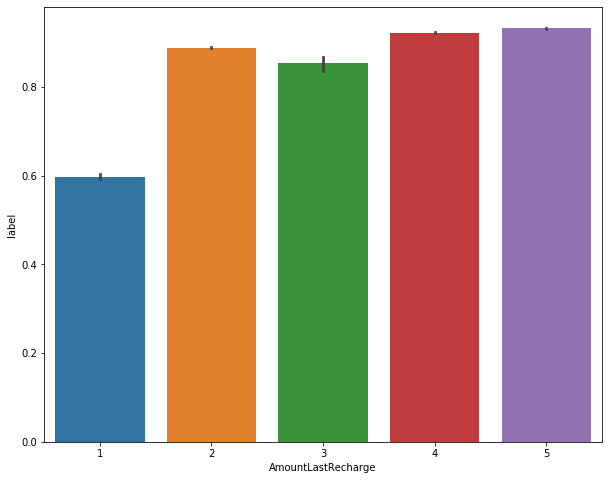

In [65]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'AmountLastRecharge', y = 'label',data = df, ax = ax)

In [66]:
bins_6 = [-1,2,4,6,8,np.inf]
labels_6 = [1,2,3,4,5]
df['AccountRechargedTimes'] = pd.cut(df['cnt_ma_rech90'],bins = bins_6,labels = labels_6)

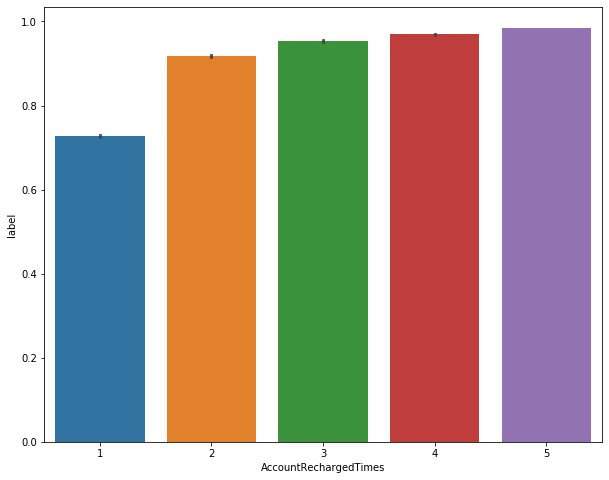

In [67]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'AccountRechargedTimes', y = 'label',data = df, ax = ax)

In [68]:
bins_7 = [-5,2,4,6,8,np.inf]
labels_7 = [1,2,3,4,5]
df['AccountRechargedFrequency'] = pd.cut(df['fr_ma_rech90'],bins = bins_7,labels = labels_7)

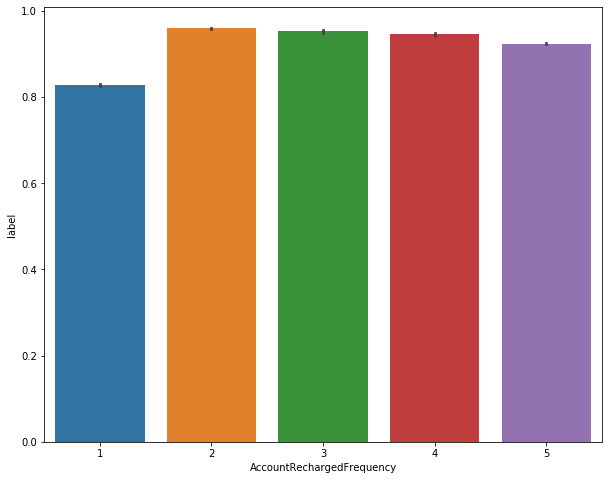

In [69]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'AccountRechargedFrequency', y = 'label',data = df, ax = ax)

In [70]:
bins_8 = [-1,200,450,800,1500,2000,np.inf]
labels_8 = [1,2,3,4,5, 6]
df['TotalBalance'] = pd.cut(df['sumamnt_ma_rech90'],bins = bins_8,labels = labels_8)

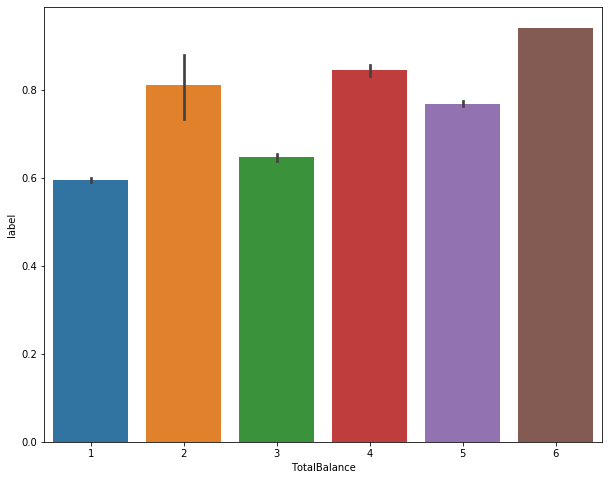

In [71]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'TotalBalance', y = 'label',data = df, ax = ax)

In [72]:
bins_9 = [-1,200,900,1800,2500,np.inf]
labels_9 = [1,2,3,4,5]
df['MedianBalance'] = pd.cut(df['medianamnt_ma_rech90'],bins = bins_9,labels = labels_9)

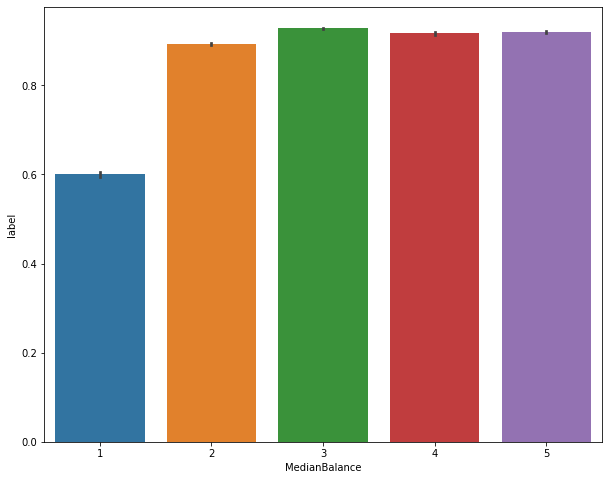

In [73]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'MedianBalance', y = 'label',data = df, ax = ax)

In [74]:
bins_10 = [-1,20,60,100,150,np.inf]
labels_10 = [1,2,3,4,5]
df['MedianPreBalance'] = pd.cut(df['medianmarechprebal90'],bins = bins_10,labels = labels_10)

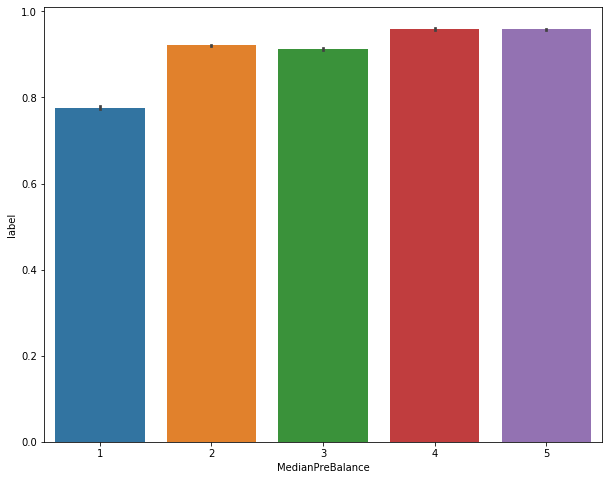

In [75]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'MedianPreBalance', y = 'label',data = df, ax = ax)

In [76]:
bins_11 = [-1,1,2,4,np.inf]
labels_11 = [1,2,3,4]
df['CountLoan'] = pd.cut(df['cnt_loans90'],bins = bins_11,labels = labels_11)

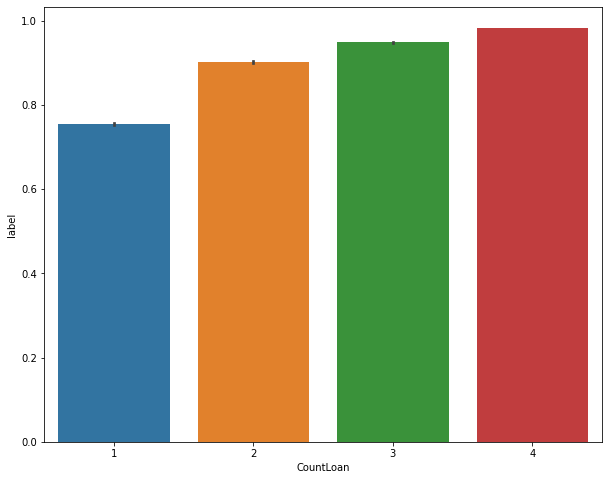

In [77]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'CountLoan', y = 'label',data = df, ax = ax)

In [78]:
bins_12 = [-1,5,10,15,20,25,np.inf]
labels_12 = [1,2,3,4,5,6]
df['Loan Amount'] = pd.cut(df['amnt_loans90'],bins = bins_12,labels = labels_12)

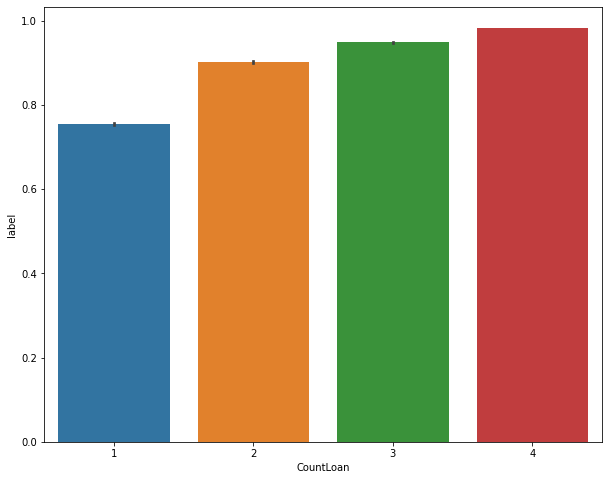

In [79]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'CountLoan', y = 'label',data = df, ax = ax)

In [80]:
df.drop('medianamnt_loans90',axis = 1,inplace = True) # Dropping this column because it is of no use

In [81]:
bins_13 = [-1,2,4,6,8,np.inf]
labels_13 = [1,2,3,4,5]
df['Pay back'] = pd.cut(df['payback90'],bins = bins_13,labels = labels_13)

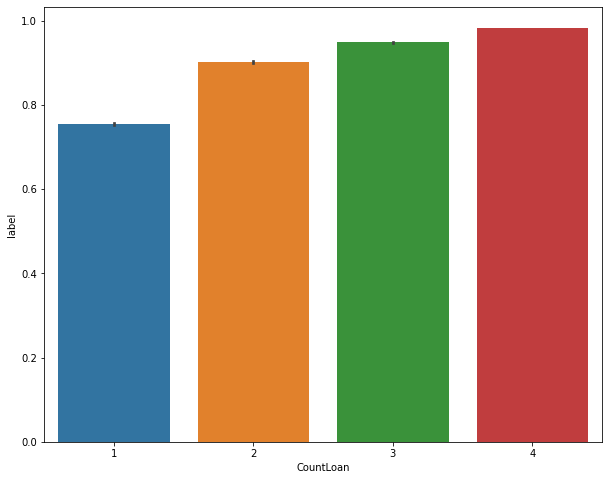

In [82]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'CountLoan', y = 'label',data = df, ax = ax)

In [83]:
bins_14 = [-1,6,12]
labels_14 = [1,2]
df['MaxAmountLoan'] = pd.cut(df['maxamnt_loans90'],bins = bins_14,labels=labels_14)

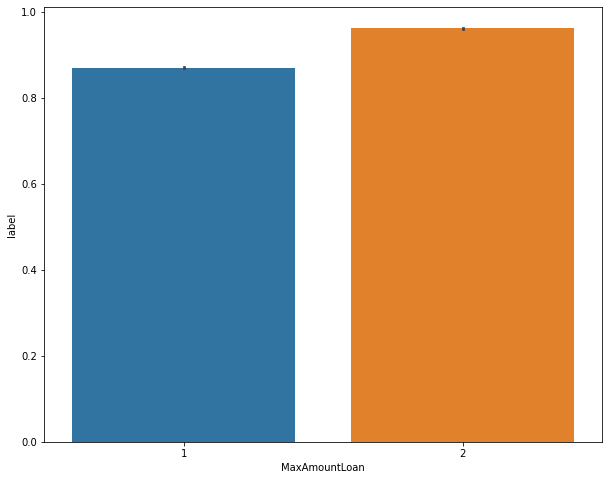

In [84]:
figsize = (10,8)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'MaxAmountLoan', y = 'label',data = df, ax = ax)

In [85]:
df.head()

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,...,AmountLastRecharge,AccountRechargedTimes,AccountRechargedFrequency,TotalBalance,MedianBalance,MedianPreBalance,CountLoan,Loan Amount,Pay back,MaxAmountLoan
Index,,,,,,,,,,,,,,,,,,,,,
2,1.0,712.0,12122.000000,3691.26,20.0,5787.0,1.0,0.0,5787.0,5787.0,...,5,1,1,6,5,3,1,3,1,2
3,1.0,535.0,1398.000000,900.13,3.0,1539.0,1.0,0.0,1539.0,1539.0,...,4,1,1,5,3,3,1,2,1,1
4,1.0,241.0,21.228000,159.42,41.0,947.0,1.0,0.0,947.0,947.0,...,3,1,1,4,3,1,2,3,1,1
5,1.0,947.0,150.619333,1098.90,4.0,2309.0,8.0,2.0,23496.0,2888.0,...,5,4,1,6,5,2,4,6,2,1
6,1.0,568.0,2257.362667,380.13,2.0,1539.0,8.0,0.0,11744.0,1539.0,...,4,4,1,6,3,2,3,4,5,1


In [86]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback90',
       'AgeOnNetwork', 'DailyAmountSpent', 'AverageMainBalance',
       'DaysTillLastRecharge', 'AmountLastRecharge', 'AccountRechargedTimes',
       'AccountRechargedFrequency', 'TotalBalance', 'MedianBalance',
       'MedianPreBalance', 'CountLoan', 'Loan Amount', 'Pay back',
       'MaxAmountLoan'],
      dtype='object')

In [87]:
# dropping all the previous values of dataset
df.drop(['aon', 'daily_decr30', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback90'], axis = 1, inplace = True)

In [88]:
df.head()

,label,AgeOnNetwork,DailyAmountSpent,AverageMainBalance,DaysTillLastRecharge,AmountLastRecharge,AccountRechargedTimes,AccountRechargedFrequency,TotalBalance,MedianBalance,MedianPreBalance,CountLoan,Loan Amount,Pay back,MaxAmountLoan
Index,,,,,,,,,,,,,,,
2,1.0,6,6,6,4,5,1,1,6,5,3,1,3,1,2
3,1.0,4,3,5,2,4,1,1,5,3,3,1,2,1,1
4,1.0,2,1,1,4,3,1,1,4,3,1,2,3,1,1
5,1.0,7,1,5,2,5,4,1,6,5,2,4,6,2,1
6,1.0,4,4,2,1,4,4,1,6,3,2,3,4,5,1


In [89]:
print(df.shape)
print((df.isnull().sum()).sum())

(310017, 15)
0


In [90]:
# Separate the Input and output features
X = df.drop(['label'],axis = 1)
y = df['label']

In [91]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.01, random_state=7)

In [92]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (306916, 14)
X_test:  (3101, 14)
y_train:  (306916,)
y_test:  (3101,)


- Now import different models and see who gives the best accuracy 

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test)*100,2)
print( "MODEL-1: Accuracy of LogisticRegression : ", acc_logreg  )

MODEL-1: Accuracy of LogisticRegression :  87.78


In [94]:
acc_logreg

87.78

In [95]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_gauss_pred = gauss.predict(X_test)
acc_gauss = round(accuracy_score(y_gauss_pred,y_test)*100,2)
print( "MODEL-2: Accuracy of GaussianNB : ", acc_gauss  )

MODEL-2: Accuracy of GaussianNB :  78.78


In [96]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_lsvc_pred = linear_svc.predict(X_test)
acc_lsvc = round(accuracy_score(y_lsvc_pred,y_test)*100,2)
print( "MODEL-3: Accuracy of LinearSVC : ", acc_lsvc  )

MODEL-3: Accuracy of LinearSVC :  87.17


/home/bhweshgaur1/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [97]:
from sklearn.linear_model import Perceptron

percep = Perceptron()
percep.fit(X_train,y_train)
y_percep_pred = percep.predict(X_test)
acc_percep = round(accuracy_score(y_percep_pred,y_test)*100,2)
print( "MODEL-4: Accuracy of Perceptron : ", acc_percep  )

MODEL-4: Accuracy of Perceptron :  87.13


In [98]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_dt_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_dt_pred, y_test) * 100, 2)
print( "MODEL-5: Accuracy of DecisionTreeClassifier : ", acc_decisiontree  )

MODEL-5: Accuracy of DecisionTreeClassifier :  92.03


In [99]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print( "MODEL-6: Accuracy of RandomForestClassifier : ",acc_randomforest  )

MODEL-6: Accuracy of RandomForestClassifier :  92.16


In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print( "MODEL-7: Accuracy of k-Nearest Neighbors : ",acc_knn  )

MODEL-7: Accuracy of k-Nearest Neighbors :  88.94


In [101]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print( "MODEL-8: Accuracy of Stochastic Gradient Descent : ",acc_sgd )

MODEL-8: Accuracy of Stochastic Gradient Descent :  87.2


In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print( "MODEL-9: Accuracy of GradientBoostingClassifier : ",acc_gbk )

MODEL-9: Accuracy of GradientBoostingClassifier :  88.46


In [103]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Gaussian Naive Bayes',
              'Linear SVC', 'Perceptron',  'Decision Tree',
              'Random Forest', 'KNN','Stochastic Gradient Descent',
              'Gradient Boosting Classifier'],
    'Score': [acc_logreg, acc_gauss, acc_lsvc, acc_percep,  acc_decisiontree,
              acc_randomforest,  acc_knn,  acc_sgd, acc_gbk]
                    })


print('Models:')
models.sort_values(by='Score', ascending=False)

Models:


,Model,Score
5,Random Forest,92.16
4,Decision Tree,92.03
6,KNN,88.94
8,Gradient Boosting Classifier,88.46
0,Logistic Regression,87.78
7,Stochastic Gradient Descent,87.20
2,Linear SVC,87.17
3,Perceptron,87.13
1,Gaussian Naive Bayes,78.78
